# Importing necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Extract, Transform, Load

In [2]:
def handle_encoding_error(file_path):
    # Try reading the file with a different encoding
    try:
        # Read with 'latin1' encoding
        data = pd.read_csv(file_path, encoding='latin1')
        
        # Save the data with UTF-8 encoding
        new_file_path = 'SKYWARDS_NEW.csv'
        data.to_csv(new_file_path, index=False, encoding='utf-8')   
    
    except Exception as e:
        print(f"An error occurred: {e}")


file_path = 'SKYWARDS_DATA_CW2_old.csv'
handle_encoding_error(file_path)

In [3]:
df = pd.read_csv('SKYWARDS_NEW.csv')

In [4]:
df.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Flight Distance Rounded,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,460,4760,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,235,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,1142,4760,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,562,560,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,N,61,55 to 64,Business travel,Business,214,4760,...,5,3,3,4,4,3,3,3,0,0.0


# Data Cleaning

**Checking and Removing null values**

In [5]:
null_value = df.isna().sum()
null_value

Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Flight Distance Rounded                0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service

In [6]:
#Dropping null values
df.dropna(inplace=True)

In [7]:
#Checking and removing the null values
check_duplicate = df.duplicated().any()
check_duplicate

False

# EDA

# Data Visualization

**Distribution of Class and Satisfaction Levels**

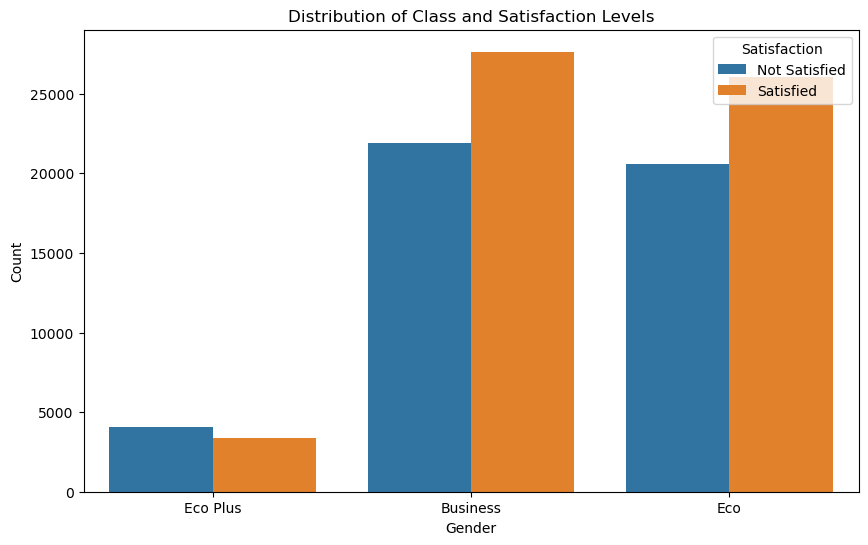

In [8]:
# Count Plot for Class and Satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', hue='Satisfied', data=df)
plt.title('Distribution of Class and Satisfaction Levels')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Satisfaction', loc='upper right', labels=['Not Satisfied', 'Satisfied']) 
plt.show()

**Distribution of Type of Travel and Satisfaction Levels**

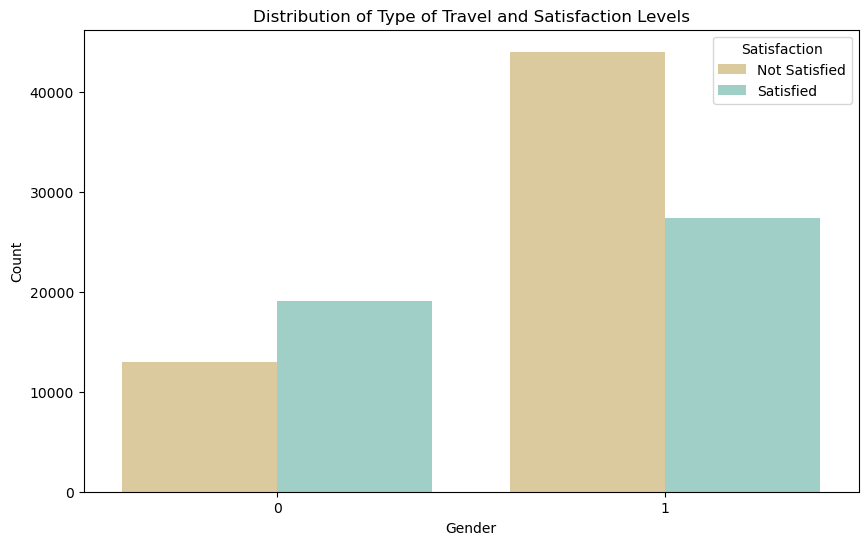

In [37]:
# Count Plot for Type of Travel and Satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Travel', hue='Satisfied', data=df , palette = 'BrBG')
plt.title('Distribution of Type of Travel and Satisfaction Levels')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Satisfaction', loc='upper right', labels=['Not Satisfied', 'Satisfied']) 
plt.show()

**Box plot for comparing different features with Satisfaction**

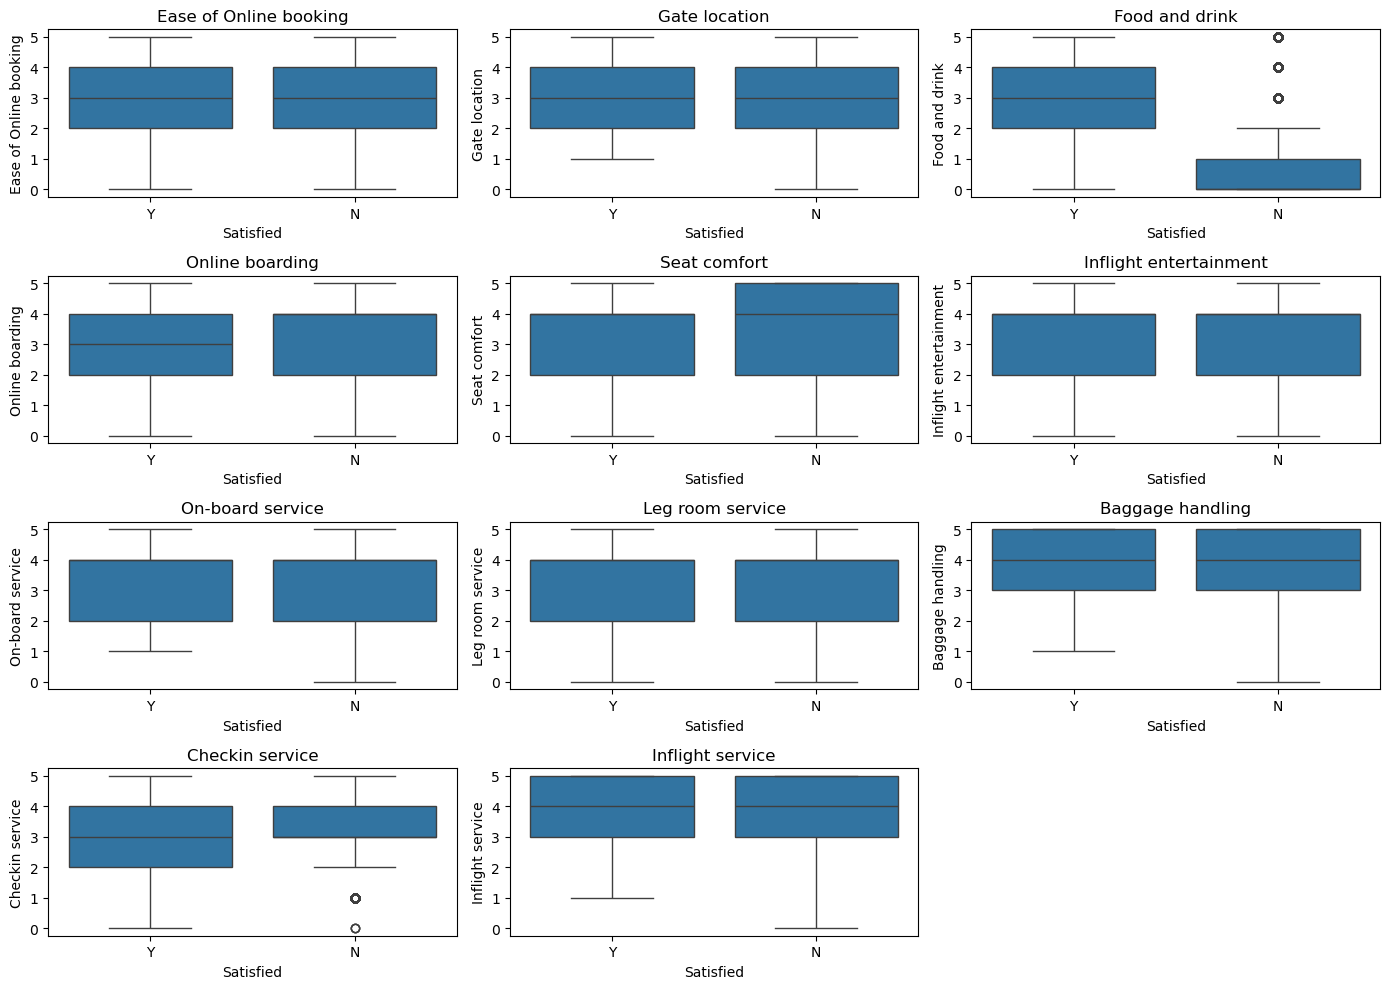

In [10]:
features = ['Ease of Online booking', 'Gate location', 'Food and drink',
            'Online boarding', 'Seat comfort', 'Inflight entertainment',
            'On-board service', 'Leg room service', 'Baggage handling',
            'Checkin service', 'Inflight service']

# Setting the figure size and layout
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)  # Adjust grid dimensions accordingly
    sns.boxplot(x='Satisfied', y=feature, data=df)
    plt.title(feature)
    plt.tight_layout()

plt.show()

**Impact of Departure and Arrival Delays on Passenger Satisfaction**

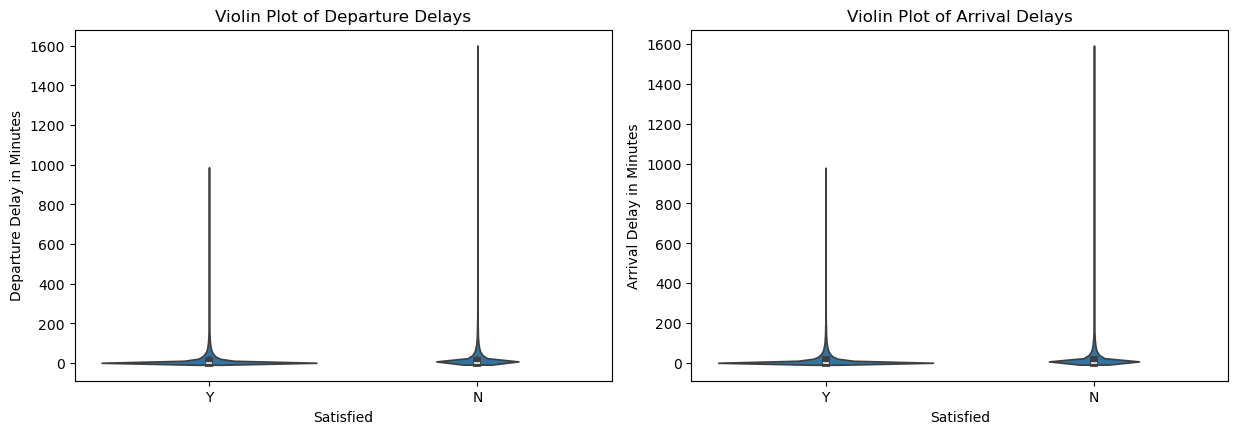

In [11]:
# Visualize
plt.figure(figsize=(18, 12))

# Violin Plots
plt.subplot(3, 3, 5)
sns.violinplot(x='Satisfied', y='Departure Delay in Minutes', data=df)
plt.title('Violin Plot of Departure Delays')

plt.subplot(3, 3, 6)
sns.violinplot(x='Satisfied', y='Arrival Delay in Minutes', data=df)
plt.title('Violin Plot of Arrival Delays')

# Adjust layout
plt.tight_layout()
plt.show()

**Analyzing Flight Delays and Their Effects on Passenger Satisfaction**

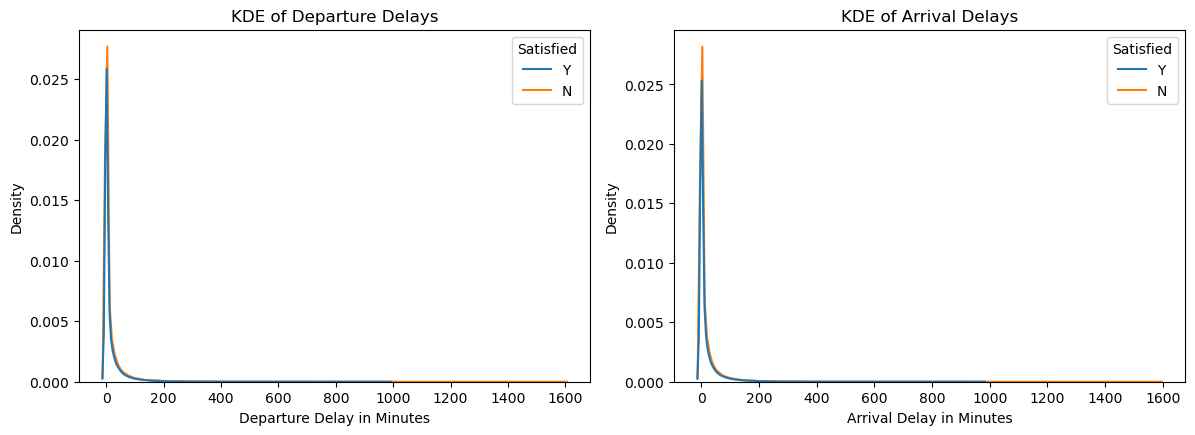

In [12]:
# Visualize
plt.figure(figsize=(18, 12))

# KDE Plot
plt.subplot(3, 3, 7)
sns.kdeplot(data=df, x='Departure Delay in Minutes', hue='Satisfied')
plt.title('KDE of Departure Delays')

plt.subplot(3, 3, 8)
sns.kdeplot(data=df, x='Arrival Delay in Minutes', hue='Satisfied')
plt.title('KDE of Arrival Delays')

# Adjust layout
plt.tight_layout()
plt.show()

**Correlation Matrix Heatmap for Numerical Features**

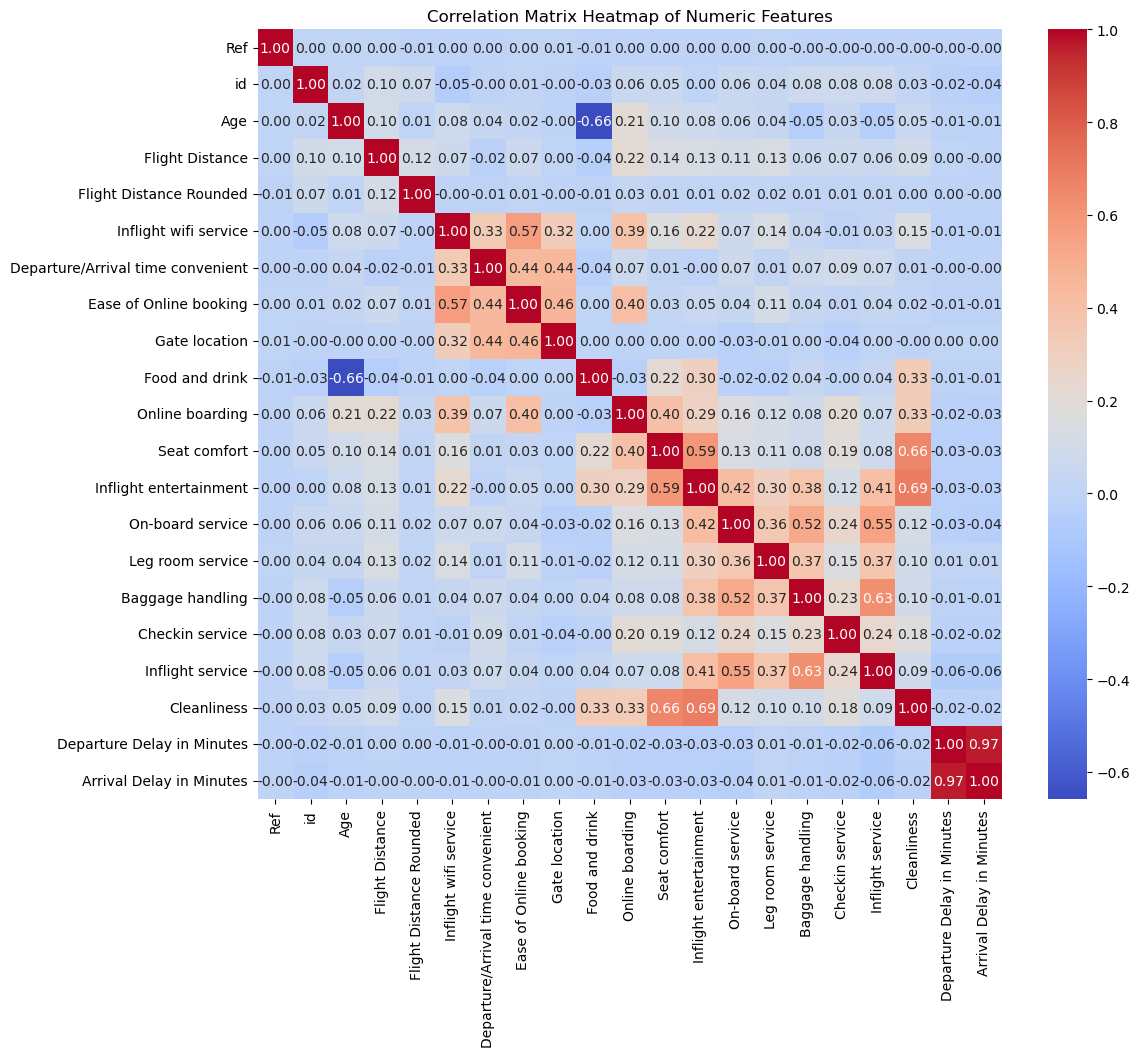

In [13]:
# Select only columns with data type int64 or float64
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix of the numeric columns
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap of Numeric Features')
plt.show()

# Data Preprocessing

In [14]:
#Data types of column
df.dtypes

Ref                                    int64
id                                     int64
Gender                                object
Satisfied                             object
Age                                    int64
Age Band                              object
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Flight Distance Rounded                int64
Destination                           object
Continent                             object
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage ha

**Print the unique value of each categorical variable**

In [15]:
# Print unique value for gender
print(df['Gender'].unique())

['Male' 'Female']


In [16]:
# Print unique value for Satisfied
print(df['Satisfied'].unique())

['Y' 'N']


In [17]:
# Print unique value for Type of Travel
print(df['Type of Travel'].unique())

['Personal Travel' 'Business travel']


In [18]:
# Print unique value for Age Band 
print(df['Age Band'].unique())

['Under 18' '25 to 34' '55 to 64' '45 to 54' '35 to 44' '18 to 24'
 '65 or over']


In [19]:
# Print unique value for Class
print(df['Class'].unique())

['Eco Plus' 'Business' 'Eco']


In [20]:
# Print unique value for Destination
print(df['Destination'].unique())

['India' 'Republic of Ireland' 'Norway' 'Italy' 'San Marino' 'Japan'
 'Vatican City' 'Egypt' 'United Kingdom' 'Switzerland' 'Svalbard' 'Cyprus'
 'Croatia' 'Kosovo' 'California' 'Greece' 'Slovenia' 'Iceland' 'Spain'
 'Lithuania' 'France' 'Hong Kong' 'São Tomé and Príncipe' 'Guinea'
 'Portugal' 'Togo' 'Tunisia' 'Moldova' 'Malta' 'Netherlands' 'Luxembourg'
 'Uzbekistan' 'Latvia' 'Chad' 'Belgium' 'Estonia' 'Poland' 'Jersey'
 'Syria' 'Germany' 'Republic of the Congo' 'Mauritius'
 'United Arab Emirates' 'Romania' 'Greenland' 'Turkey' 'Denmark'
 'Palestinian National Authority' 'Pakistan' 'Jamaica' 'Guernsey'
 'Morocco' 'Serbia' 'Sweden' 'Saudi Arabia' 'Nigeria' 'Ghana'
 'Liechtenstein' 'Kuwait' 'Saint Lucia' 'Jordan' 'North Macedonia'
 'Kyrgyzstan' 'Alabama' 'Iraq' 'Israel' 'Yemen' 'Turkmenistan'
 'Bosnia and Herzegovina' 'Benin' 'Russia' 'Cameroon' 'Libya' 'Finland'
 'Ukraine' 'Hungary' 'Lebanon' 'Venezuela' 'Faroe Islands'
 'Saint Pierre and Miquelon' 'Djibouti' 'Åland' 'Qatar' 'Ethiopia'


In [21]:
# Print unique value for Continent
print(df['Continent'].unique())

['Asia' 'Europe' 'Africa' 'North America' 'Europe/Asia (Eurasia)'
 'South America']


In [22]:
# Mapping
gender_mapping = {'Male': 0, 'Female': 1}
satisfied_mapping = {'N': 0, 'Y': 1}
travel_type_mapping = {'Personal Travel': 0, 'Business travel': 1}
age_band_mapping = {'Under 18': 0, '18 to 24': 1, '25 to 34': 2, '35 to 44': 3, '45 to 54': 4, '55 to 64': 5, '65 or over': 6}
class_mapping = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
continent_mapping = {'Asia': 0, 'Europe': 1, 'Africa': 2, 'North America': 3, 'South America': 4, 'Europe/Asia (Eurasia)': 5}

df['Gender'] = df['Gender'].map(gender_mapping)
df['Satisfied'] = df['Satisfied'].map(satisfied_mapping)
df['Type of Travel'] = df['Type of Travel'].map(travel_type_mapping)
df['Age Band'] = df['Age Band'].map(age_band_mapping)
df['Class'] = df['Class'].map(class_mapping)
df['Continent'] = df['Continent'].map(continent_mapping)

In [23]:
# One-Hot Encoding
destination_dummies = pd.get_dummies(df['Destination'], prefix='Destination')
df = pd.concat([df, destination_dummies], axis=1)
df.drop('Destination', axis=1, inplace=True)

In [24]:
df.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Flight Distance Rounded,...,Destination_Turkey,Destination_Turkmenistan,Destination_Ukraine,Destination_United Arab Emirates,Destination_United Kingdom,Destination_Uzbekistan,Destination_Vatican City,Destination_Venezuela,Destination_Yemen,Destination_Åland
0,0,70172,0,1,13,0,0,1,460,4760,...,False,False,False,False,False,False,False,False,False,False
1,1,5047,0,0,25,2,1,2,235,235,...,False,False,False,False,False,False,False,False,False,False
2,2,110028,1,1,26,2,1,2,1142,4760,...,False,False,False,False,False,False,False,False,False,False
3,3,24026,1,1,25,2,1,2,562,560,...,False,False,False,False,False,False,False,False,False,False
4,4,119299,0,0,61,5,1,2,214,4760,...,False,False,False,False,False,False,False,False,False,False


# Data Description

In [25]:
#shape of dataset
df.shape

(103594, 126)

In [26]:
#Informatory Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Columns: 126 entries, Ref to Destination_Åland
dtypes: bool(99), float64(1), int64(26)
memory usage: 31.9 MB


In [27]:
#Descriptive Analysis
df.describe()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Flight Distance Rounded,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,...,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,51950.102274,64942.428625,0.507520,0.449177,39.380466,2.966417,0.689857,1.028380,1189.325202,4164.102361,...,3.399068,3.358254,3.382493,3.351275,3.631562,3.304216,3.640665,3.286291,14.750719,15.181275
std,29997.914016,37460.816597,0.499946,0.497413,15.113125,1.578400,0.462554,0.962868,997.297235,1346.755729,...,1.365622,1.333144,1.288409,1.315519,1.181204,1.265502,1.175762,1.312294,38.200249,38.774453
min,0.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,31.000000,235.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25960.250000,32562.250000,0.000000,0.000000,27.000000,2.000000,0.000000,0.000000,414.000000,4760.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51955.500000,64890.000000,1.000000,0.000000,40.000000,3.000000,1.000000,1.000000,842.000000,4760.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77924.750000,97370.500000,1.000000,1.000000,51.000000,4.000000,1.000000,2.000000,1743.000000,4760.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,1.000000,1.000000,85.000000,6.000000,1.000000,2.000000,4983.000000,5940.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [28]:
#Calculate correlations
correlation_matrix = df.corr()
correlation_with_satisfaction = correlation_matrix['Satisfied'].sort_values(ascending=False)

In [29]:
# Set option to display all rows
pd.set_option('display.max_rows', None)

# Print the Series
print(correlation_with_satisfaction)

Satisfied                                     1.000000
Food and drink                                0.620233
Inflight wifi service                         0.126613
Departure/Arrival time convenient             0.103129
Flight Distance                               0.074118
Inflight service                              0.013990
Inflight entertainment                        0.013607
Cleanliness                                   0.012575
Destination_Turkmenistan                      0.011735
Baggage handling                              0.010189
Destination_Yemen                             0.010167
Destination_Morocco                           0.009502
Destination_Svalbard                          0.009180
Destination_United Kingdom                    0.009093
Destination_Cyprus                            0.009088
Arrival Delay in Minutes                      0.008096
Destination_Kosovo                            0.007582
Destination_Mauritius                         0.007502
Flight Dis

# Data Splitting

In [30]:
#Splitting dataset into feature and target variable
x = df.drop(['id','Satisfied'],axis=1)
y = df['Satisfied']

In [31]:
# Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state =42)

# Model training

In [32]:
# Initialize the AdaBoost Classifier
ada = AdaBoostClassifier(random_state=42)
# Train AdaBoost
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [33]:
# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# Train XGBoost
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

# Model Evaluation

In [34]:
# Predictions from both models
y_pred_ada = ada.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Function to plot confusion matrix and classification report
def plot_results(model_name, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print(f"Results for {model_name}:")
    print(f"Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Results for AdaBoost:
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     11397
           1       0.96      0.96      0.96      9322

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



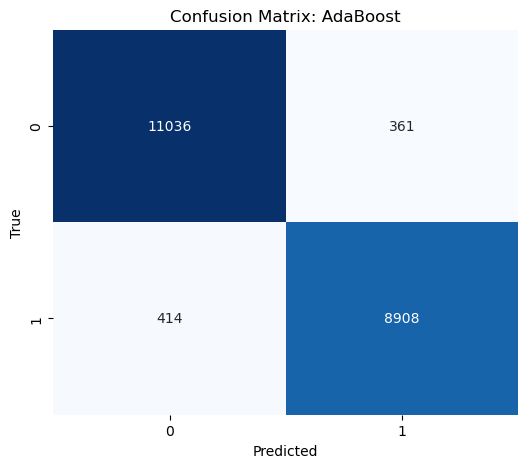

In [35]:
# Visualize results for AdaBoost
plot_results("AdaBoost", y_test, y_pred_ada)

Results for XGBoost:
Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11397
           1       0.99      0.99      0.99      9322

    accuracy                           0.99     20719
   macro avg       0.99      0.99      0.99     20719
weighted avg       0.99      0.99      0.99     20719



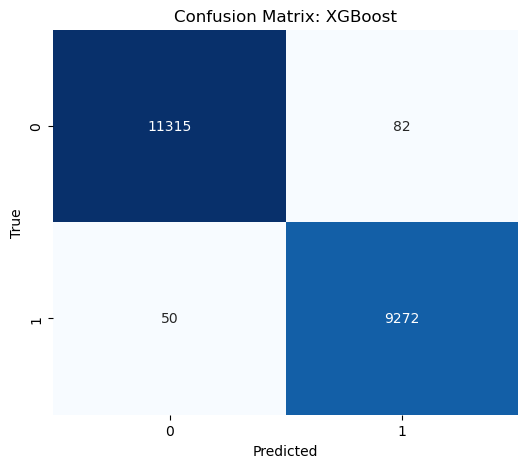

In [36]:
# Visualize results for XGBoost
plot_results("XGBoost", y_test, y_pred_xgb)